In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [9]:
companies = pd.read_csv('../data/raw/TOP40_Companies.csv')
companies['Symbol'] = companies['Symbol']+'.JO' 
companies.head()

,Company_Name,Symbol,Sector
0,4Sight Holdings Limited,4SI.JO,Financial Services
1,ABSA Bank Limited,ABSP.JO,Banks
2,Accelerate Property Fund Limited,APF.JO,Real Estate Investment Trusts
3,Accentuate Limited,ACE.JO,Chemicals
4,Acsion Limited,ACS.JO,Real Estate Investment & Services


In [17]:
income = pd.read_csv('../data/raw/TOP40_Income_Annual.csv')
income = income.merge(companies, left_on='Ticker', right_on='Symbol')

In [18]:
income.head()

,index,Ticker,costOfRevenue,discontinuedOperations,ebit,effectOfAccountingCharges,extraordinaryItems,grossProfit,incomeBeforeTax,incomeTaxExpense,...,otherOperatingExpenses,researchDevelopment,sellingGeneralAdministrative,totalOperatingExpenses,totalOtherIncomeExpenseNet,totalRevenue,Date,Company_Name,Symbol,Sector
0,2017-12-31,4SI.JO,5164250.0,NaN,4707890.0,NaN,NaN,1.879759e+07,4.624124e+06,4.398360e+05,...,-1.383900e+05,NaN,1.422809e+07,1.925395e+07,-83766.0,2.396184e+07,2017-12-31,4Sight Holdings Limited,4SI.JO,Financial Services
1,2016-12-31,4SI.JO,1324195.0,NaN,-4413615.0,NaN,NaN,9.069180e+06,-4.813063e+06,7.336230e+05,...,-2.639000e+03,NaN,1.348543e+07,1.480699e+07,-399448.0,1.039338e+07,2016-12-31,4Sight Holdings Limited,4SI.JO,Financial Services
2,2015-12-31,4SI.JO,4914919.0,NaN,4650420.0,NaN,NaN,1.355445e+07,4.781021e+06,1.192909e+06,...,-1.494950e+05,NaN,9.053529e+06,1.381895e+07,130601.0,1.846937e+07,2015-12-31,4Sight Holdings Limited,4SI.JO,Financial Services
3,2014-12-31,4SI.JO,7622527.0,NaN,3012722.0,NaN,NaN,1.041051e+07,2.818674e+06,3.507640e+05,...,-1.494950e+05,NaN,7.397786e+06,1.502031e+07,-194048.0,1.803304e+07,2014-12-31,4Sight Holdings Limited,4SI.JO,Financial Services
4,2017-12-31,ABSP.JO,136000000.0,NaN,0.0,NaN,NaN,4.480800e+10,1.175500e+10,3.278000e+09,...,2.990900e+10,NaN,2.809000e+09,3.285400e+10,-335000000.0,4.494400e+10,2017-12-31,ABSA Bank Limited,ABSP.JO,Banks


In [37]:
sector = income.groupby('Sector', as_index=False).mean()

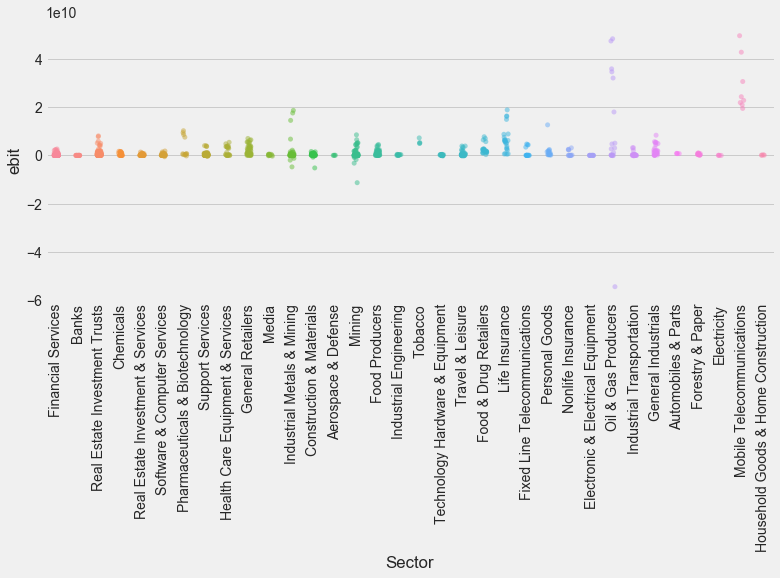

In [50]:
sns.set_style("whitegrid")

plt.style.use('fivethirtyeight')

sns.catplot(x='Sector', y='ebit', data=income, aspect=21/8.27, alpha=0.5).set_xticklabels(rotation=90)

#plt.style.use('fivethirtyeight')

C:\Users\Naeem Asvat\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: 'pandas.tools.plotting.parallel_coordinates' is deprecated, import 'pandas.plotting.parallel_coordinates' instead.
  if sys.path[0] == '':


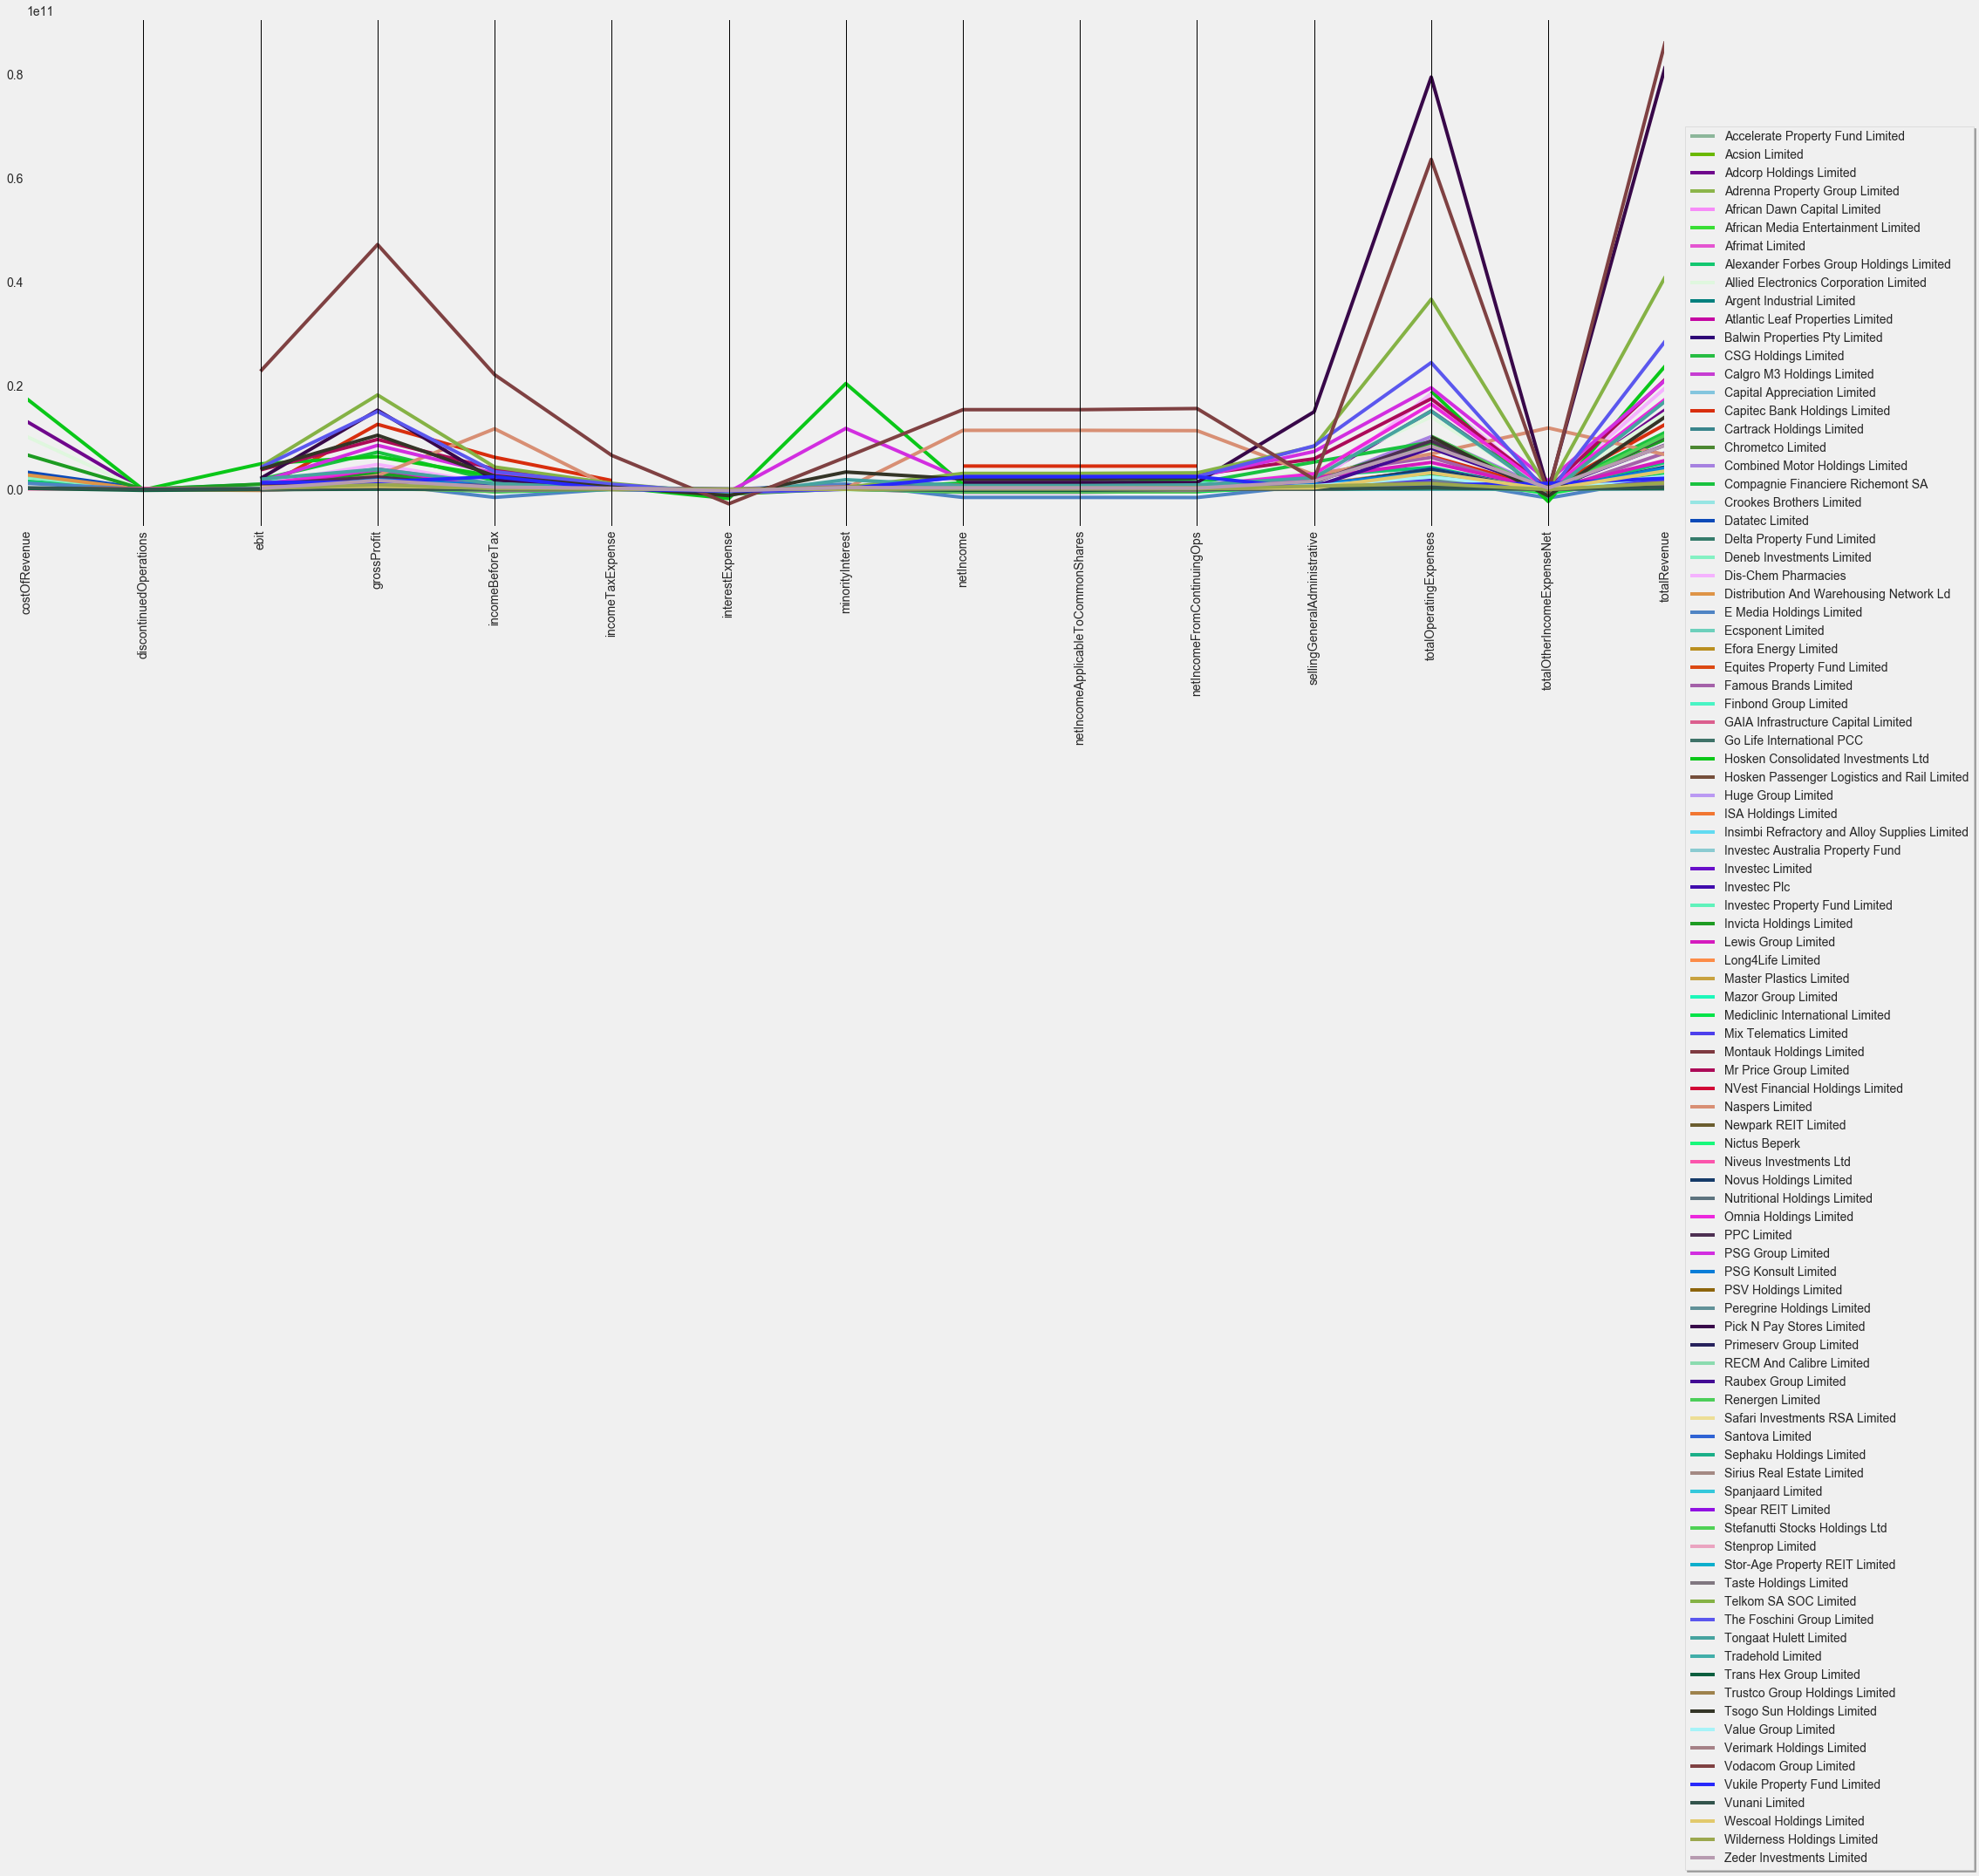

In [92]:
from pandas.tools.plotting import parallel_coordinates

data = income[pd.to_datetime(income.Date)>pd.to_datetime('2018-1-30')][['costOfRevenue', 'discontinuedOperations', 'ebit','grossProfit',
       'incomeBeforeTax', 'incomeTaxExpense', 'interestExpense',
       'minorityInterest', 'netIncome', 'netIncomeApplicableToCommonShares',
       'netIncomeFromContinuingOps',
       'sellingGeneralAdministrative', 'totalOperatingExpenses',
       'totalOtherIncomeExpenseNet', 'totalRevenue','Company_Name']].groupby('Company_Name',as_index=False).mean()



# Make the plot
plt.figure(figsize=(30,10))
g = parallel_coordinates(data, 'Company_Name')

#g.legend()

g.legend(loc='upper center', bbox_to_anchor=(1.1, 0.8),
          fancybox=False, shadow=True, ncol=1)

plt.xticks(rotation=90)

plt.show()


In [129]:
from sklearn import preprocessing

data = income[['costOfRevenue', 'discontinuedOperations', 'ebit','grossProfit',
       'incomeBeforeTax', 'incomeTaxExpense', 'interestExpense',
       'minorityInterest', 'netIncome', 'netIncomeApplicableToCommonShares',
       'netIncomeFromContinuingOps',
       'sellingGeneralAdministrative', 'totalOperatingExpenses',
       'totalOtherIncomeExpenseNet', 'totalRevenue','Company_Name','Sector']].groupby(['Company_Name','Sector'],as_index=False).mean()

dataset = pd.DataFrame()

for i in  data.Sector.unique():
    scalar = preprocessing.MinMaxScaler()
    print(i)
    
    firm = pd.DataFrame(scalar.fit_transform(data.loc[data.Sector==i].select_dtypes(float)),columns=data.loc[data.Sector==i].select_dtypes(float).columns)
    #print(firm.shape)
    firm['Sector']=i
    dataset = pd.concat([dataset,firm])
    
#dataset['Sector','Company_Name'] = data['Sector','Company_Name']

Financial Services
Banks
Chemicals
Support Services
Food Producers
Software & Computer Services
Real Estate Investment Trusts
Real Estate Investment & Services
Pharmaceuticals & Biotechnology
Health Care Equipment & Services
General Retailers
Media
Industrial Metals & Mining
Construction & Materials
Aerospace & Defense
Mining
Industrial Engineering
Tobacco
Technology Hardware & Equipment


C:\Users\Naeem Asvat\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:353: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
C:\Users\Naeem Asvat\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:354: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)
C:\Users\Naeem Asvat\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:353: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
C:\Users\Naeem Asvat\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:354: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)
C:\Users\Naeem Asvat\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:353: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
C:\Users\Naeem Asvat\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:354: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)
C:\Users\Naeem Asvat\Anaconda3\lib\site-

Travel & Leisure
Food & Drug Retailers
Life Insurance
Fixed Line Telecommunications
Personal Goods
Nonlife Insurance
Electronic & Electrical Equipment
Oil & Gas Producers
Industrial Transportation
General Industrials
Mobile Telecommunications
Automobiles & Parts
Forestry & Paper
Electricity
Household Goods & Home Construction


C:\Users\Naeem Asvat\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:353: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
C:\Users\Naeem Asvat\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:354: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)
C:\Users\Naeem Asvat\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:353: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
C:\Users\Naeem Asvat\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:354: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)
C:\Users\Naeem Asvat\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:353: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
C:\Users\Naeem Asvat\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:354: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)
C:\Users\Naeem Asvat\Anaconda3\lib\site-

C:\Users\Naeem Asvat\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:353: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
C:\Users\Naeem Asvat\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:354: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)
C:\Users\Naeem Asvat\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:353: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
C:\Users\Naeem Asvat\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:354: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)
C:\Users\Naeem Asvat\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:353: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
C:\Users\Naeem Asvat\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:354: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)
C:\Users\Naeem Asvat\Anaconda3\lib\site-

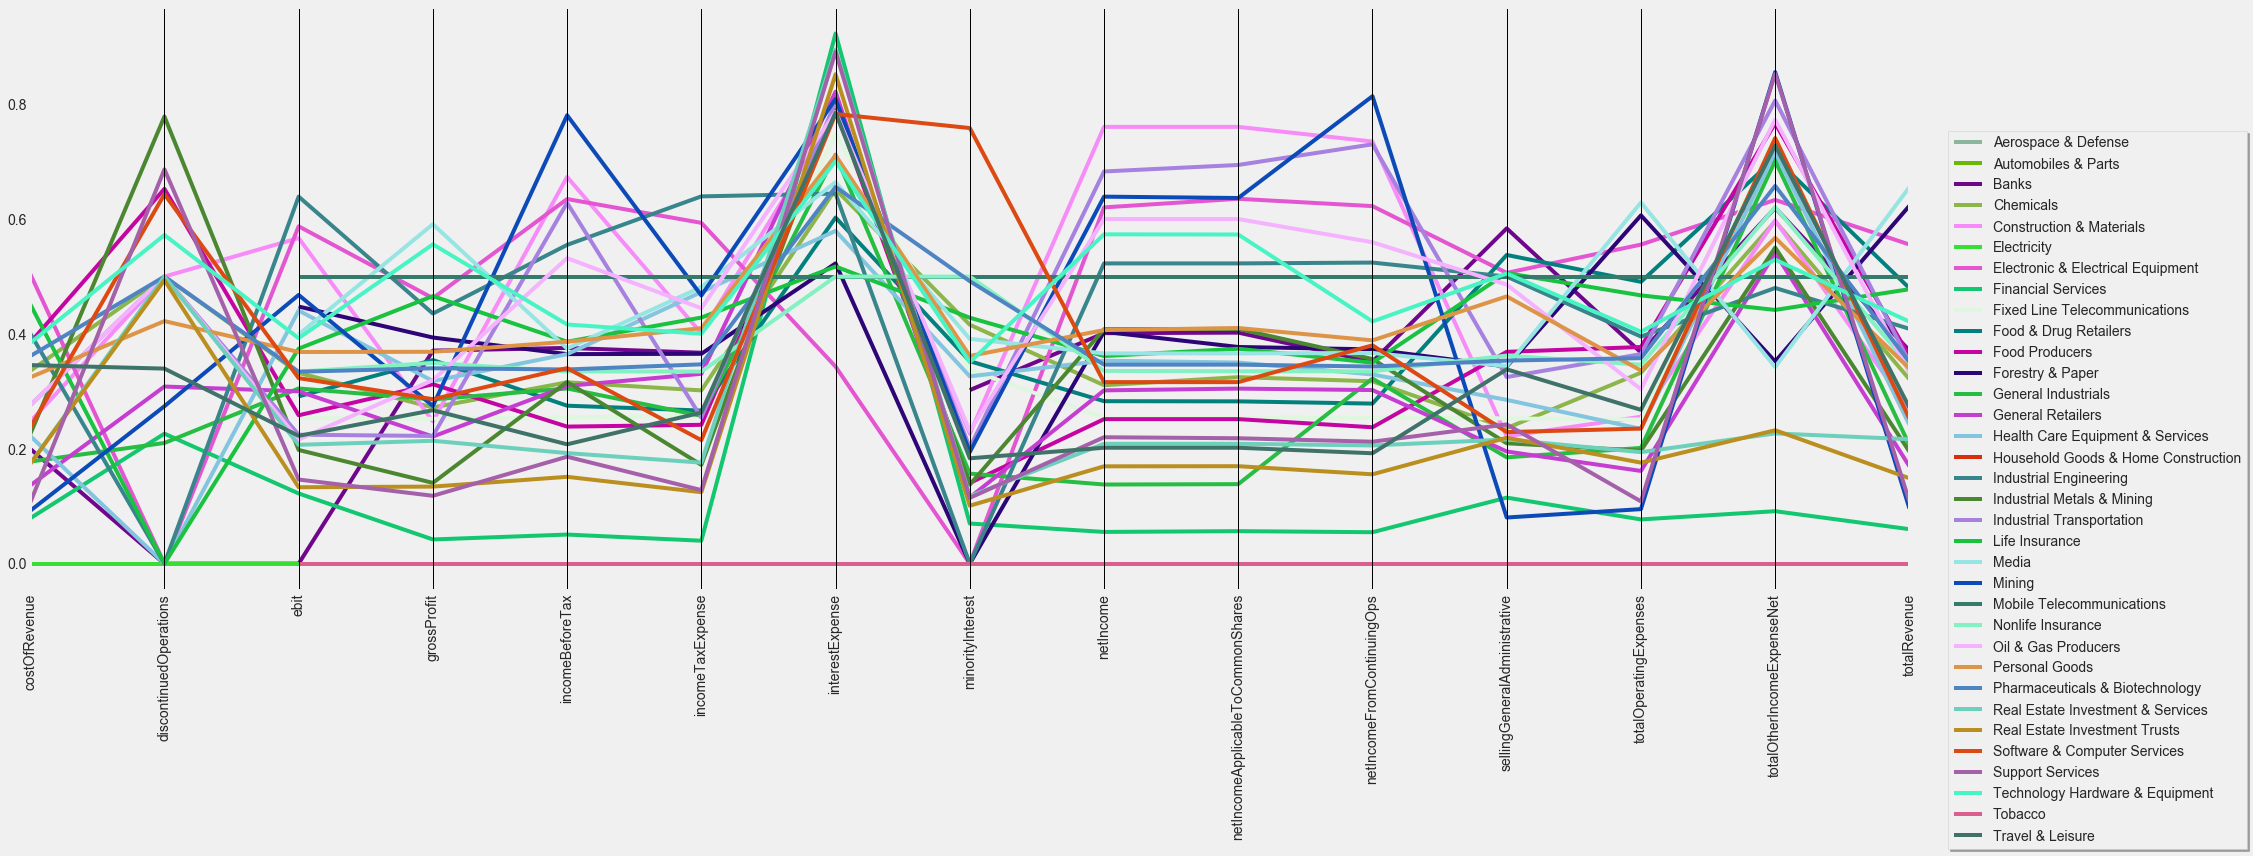

In [132]:
from pandas.tools.plotting import parallel_coordinates
 
# Make the plot
plt.figure(figsize=(30,10))

from sklearn import preprocessing

data = income[['costOfRevenue', 'discontinuedOperations', 'ebit','grossProfit',
       'incomeBeforeTax', 'incomeTaxExpense', 'interestExpense',
       'minorityInterest', 'netIncome', 'netIncomeApplicableToCommonShares',
       'netIncomeFromContinuingOps',
       'sellingGeneralAdministrative', 'totalOperatingExpenses',
       'totalOtherIncomeExpenseNet', 'totalRevenue','Company_Name','Sector']].groupby(['Company_Name','Sector'],as_index=False).mean()

dataset = pd.DataFrame()

for i in  data.Sector.unique():
    scalar = preprocessing.MinMaxScaler()
    #print(i)
    
    firm = pd.DataFrame(scalar.fit_transform(data.loc[data.Sector==i].select_dtypes(float)),columns=data.loc[data.Sector==i].select_dtypes(float).columns)
    #print(firm.shape)
    firm['Sector']=i
    dataset = pd.concat([dataset,firm])
    
g = parallel_coordinates(dataset.groupby('Sector',as_index=False).mean(), 'Sector')

#g.legend()

g.legend(loc='upper center', bbox_to_anchor=(1.1, 0.8),
          fancybox=False, shadow=True, ncol=1)

plt.xticks(rotation=90)

plt.show()

In [96]:
from sklearn import preprocessing

scalar = preprocessing.MinMaxScaler()

scalar.fit_transform()

C:\Users\Naeem Asvat\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: 'pandas.tools.plotting.parallel_coordinates' is deprecated, import 'pandas.plotting.parallel_coordinates' instead.
  # Remove the CWD from sys.path while we load stuff.


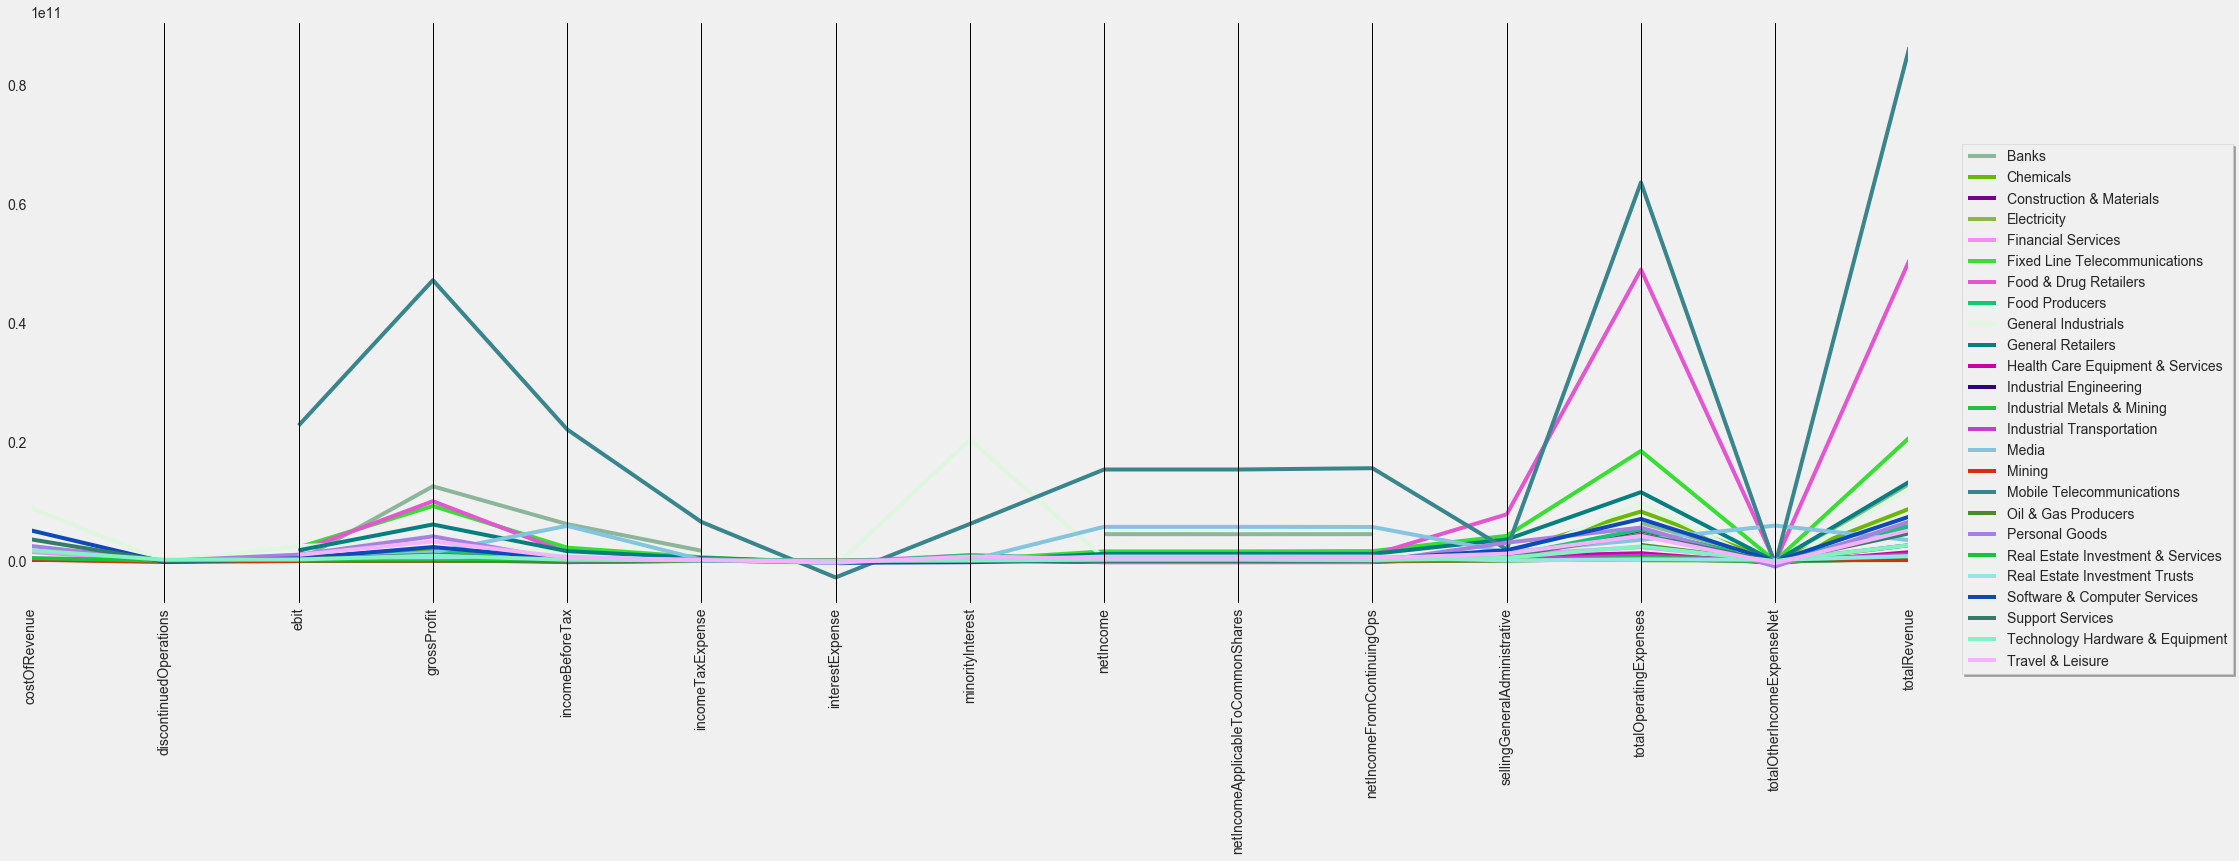

In [83]:
from pandas.tools.plotting import parallel_coordinates
 
# Make the plot
plt.figure(figsize=(30,10))
g = parallel_coordinates(income[pd.to_datetime(income.Date)>pd.to_datetime('2018-1-30')][['costOfRevenue', 'discontinuedOperations', 'ebit','grossProfit',
       'incomeBeforeTax', 'incomeTaxExpense', 'interestExpense',
       'minorityInterest', 'netIncome', 'netIncomeApplicableToCommonShares',
       'netIncomeFromContinuingOps',
       'sellingGeneralAdministrative', 'totalOperatingExpenses',
       'totalOtherIncomeExpenseNet', 'totalRevenue','Sector']].groupby('Sector',as_index=False).mean(), 'Sector')

#g.legend()

g.legend(loc='upper center', bbox_to_anchor=(1.1, 0.8),
          fancybox=False, shadow=True, ncol=1)

plt.xticks(rotation=90)

plt.show()


In [79]:
income

,index,Ticker,costOfRevenue,discontinuedOperations,ebit,effectOfAccountingCharges,extraordinaryItems,grossProfit,incomeBeforeTax,incomeTaxExpense,...,otherOperatingExpenses,researchDevelopment,sellingGeneralAdministrative,totalOperatingExpenses,totalOtherIncomeExpenseNet,totalRevenue,Date,Company_Name,Symbol,Sector
0,2017-12-31,4SI.JO,5.164250e+06,NaN,4.707890e+06,NaN,NaN,1.879759e+07,4.624124e+06,4.398360e+05,...,-1.383900e+05,NaN,1.422809e+07,1.925395e+07,-8.376600e+04,2.396184e+07,2017-12-31,4Sight Holdings Limited,4SI.JO,Financial Services
1,2016-12-31,4SI.JO,1.324195e+06,NaN,-4.413615e+06,NaN,NaN,9.069180e+06,-4.813063e+06,7.336230e+05,...,-2.639000e+03,NaN,1.348543e+07,1.480699e+07,-3.994480e+05,1.039338e+07,2016-12-31,4Sight Holdings Limited,4SI.JO,Financial Services
2,2015-12-31,4SI.JO,4.914919e+06,NaN,4.650420e+06,NaN,NaN,1.355445e+07,4.781021e+06,1.192909e+06,...,-1.494950e+05,NaN,9.053529e+06,1.381895e+07,1.306010e+05,1.846937e+07,2015-12-31,4Sight Holdings Limited,4SI.JO,Financial Services
3,2014-12-31,4SI.JO,7.622527e+06,NaN,3.012722e+06,NaN,NaN,1.041051e+07,2.818674e+06,3.507640e+05,...,-1.494950e+05,NaN,7.397786e+06,1.502031e+07,-1.940480e+05,1.803304e+07,2014-12-31,4Sight Holdings Limited,4SI.JO,Financial Services
4,2017-12-31,ABSP.JO,1.360000e+08,NaN,0.000000e+00,NaN,NaN,4.480800e+10,1.175500e+10,3.278000e+09,...,2.990900e+10,NaN,2.809000e+09,3.285400e+10,-3.350000e+08,4.494400e+10,2017-12-31,ABSA Bank Limited,ABSP.JO,Banks
5,2016-12-31,ABSP.JO,1.310000e+08,NaN,0.000000e+00,NaN,NaN,4.219700e+10,1.341100e+10,3.477000e+09,...,2.584600e+10,NaN,2.566000e+09,2.854300e+10,-3.740000e+08,4.232800e+10,2016-12-31,ABSA Bank Limited,ABSP.JO,Banks
6,2015-12-31,ABSP.JO,5.600000e+07,NaN,0.000000e+00,NaN,NaN,4.090700e+10,1.371000e+10,3.663000e+09,...,2.439100e+10,NaN,2.869000e+09,2.731600e+10,6.300000e+07,4.096300e+10,2015-12-31,ABSA Bank Limited,ABSP.JO,Banks
7,2014-12-31,ABSP.JO,1.050000e+08,NaN,0.000000e+00,NaN,NaN,3.911100e+10,1.287000e+10,3.570000e+09,...,2.351800e+10,NaN,2.463000e+09,2.608600e+10,-2.600000e+08,3.921600e+10,2014-12-31,ABSA Bank Limited,ABSP.JO,Banks
8,2018-03-31,APF.JO,3.065160e+08,NaN,8.291410e+08,NaN,NaN,8.999230e+08,1.083197e+09,-4.549000e+06,...,-6.552000e+06,NaN,7.733400e+07,3.772980e+08,2.540560e+08,1.206439e+09,2018-03-31,Accelerate Property Fund Limited,APF.JO,Real Estate Investment Trusts
9,2017-03-31,APF.JO,2.863140e+08,NaN,7.451500e+08,NaN,NaN,8.136430e+08,9.023080e+08,4.230000e+05,...,-5.529000e+06,NaN,7.402200e+07,3.548070e+08,1.571580e+08,1.099957e+09,2017-03-31,Accelerate Property Fund Limited,APF.JO,Real Estate Investment Trusts
